<a href="https://colab.research.google.com/github/valihuseyin/AI_101/blob/main/Gorev7_Huseyin_Karadag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Çoklu Regresyona uygun bir veri seti bulun, çoklu linear regresyon modelini oluşturun.
Ve derste gördüğümüz metriklerle değerlendirin.**

Veri setimiz:

Özellikler (X): TV, Radio, Newspaper reklam harcamaları

Hedef (y): Sales

Amaç:

Her reklam kanalının satışa katkısını ölçmek (katsayılar).

Modeli test seti üzerinde değerlendirmek.

Gerçek değerler ile tahminleri aynı line chart üzerinde göstermek.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
#modelimiz
model = LinearRegression()

In [5]:
#read data
df = pd.read_csv('advertising.csv')

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
x =df [['TV','Radio','Newspaper']]
y =df[['Sales']]

In [9]:
#train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=34)

In [11]:
# modelimiz model besleyelim
model.fit(x_train,y_train)

LinearRegression()

In [12]:
tahmin = model.predict(x_test)

Katsayılar (Coefficient):

TV için katsayı en yüksekse, TV reklamına 1 birim daha fazla yatırım yapıldığında satışların ortalama artış miktarını gösterir.

Radio için katsayı da pozitifse radyo reklamı da katkı sağlar.

Newspaper katsayısı genelde çok küçük veya anlamsız çıkar → gazete reklamı satışlara çok az etki eder.

R² skoru: Modelin test setinde veriyi ne kadar açıkladığını gösterir.

In [13]:
model.coef_

array([[ 0.04698715,  0.19360408, -0.00120282]])

en yüksek radyo  görünüyor.

In [14]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [15]:
model.intercept_

array([2.55693148])

In [16]:
#"MSE:",
mean_squared_error(y_test, tahmin)

3.1911211213641772

In [17]:
#"R2 Score:"
r2_score(y_test, tahmin)

0.8925087896627704

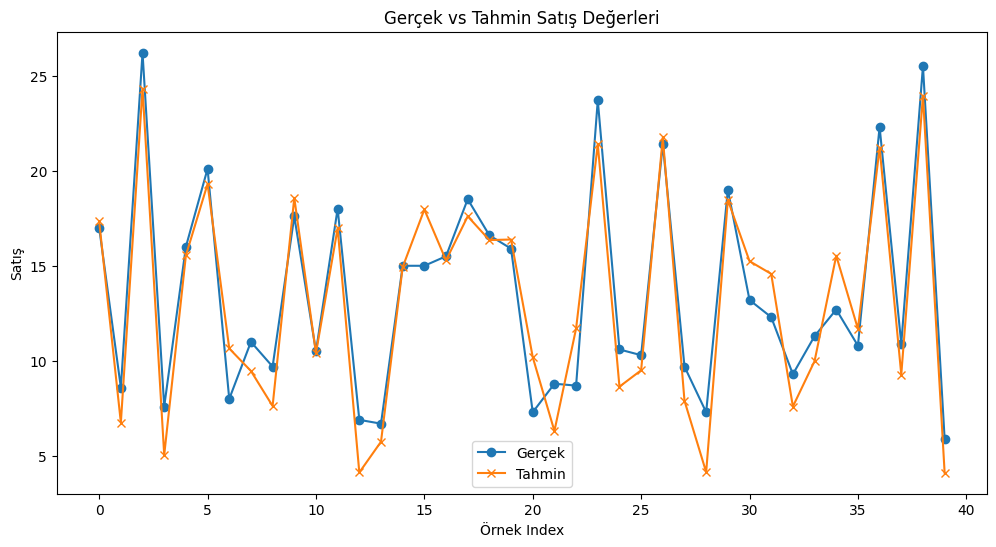

In [18]:
# Visualization
plt.figure(figsize=(12,6))
plt.plot(range(len(y_test)), y_test.values, label="Gerçek", marker='o')
plt.plot(range(len(tahmin)), tahmin, label="Tahmin", marker='x')
plt.xlabel("Örnek Index")
plt.ylabel("Satış")
plt.title("Gerçek vs Tahmin Satış Değerleri")
plt.legend()
plt.show()